In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # adjust the configurations of plots we create

#Read in the data 


df=pd.read_csv('/Users/mankomalsohi/Desktop/movies.csv')




In [2]:
#Lets look at the data 
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# Checking for nulls in the dataset

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Replace nulls with 0 for data cleaning

for col in df.columns:
    df[col].fillna(0, inplace=True)  
    

In [5]:
# To check if there is any null value left 
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing data type of columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [10]:
 df['yearcorrect'] = df['released'].astype(str).str.split().str[2]


In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [12]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


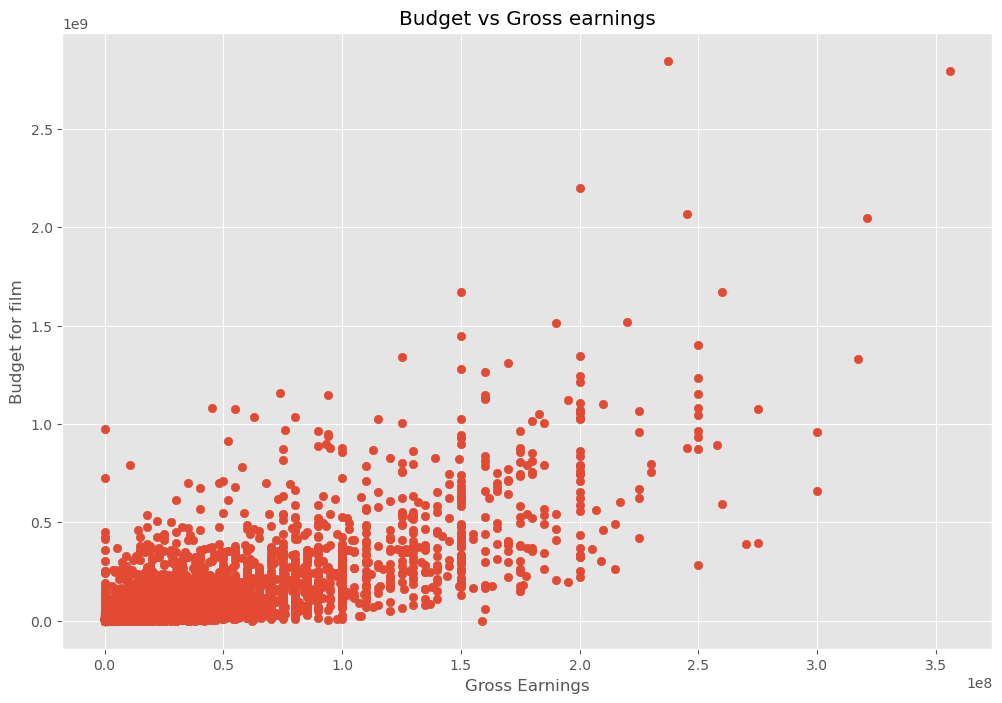

In [15]:
#Scatter plot with budget and gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

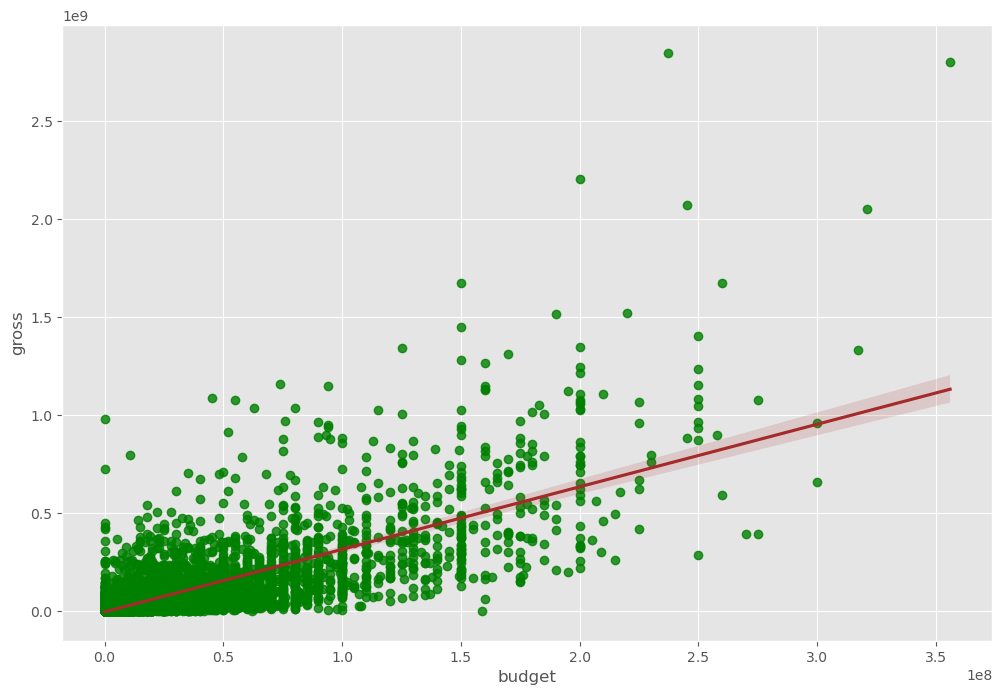

In [16]:
# Plot the Budget vs Gross using seaborn
sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"green"},line_kws={"color":"brown"})

In [17]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [18]:
df.corr(method='kendall',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


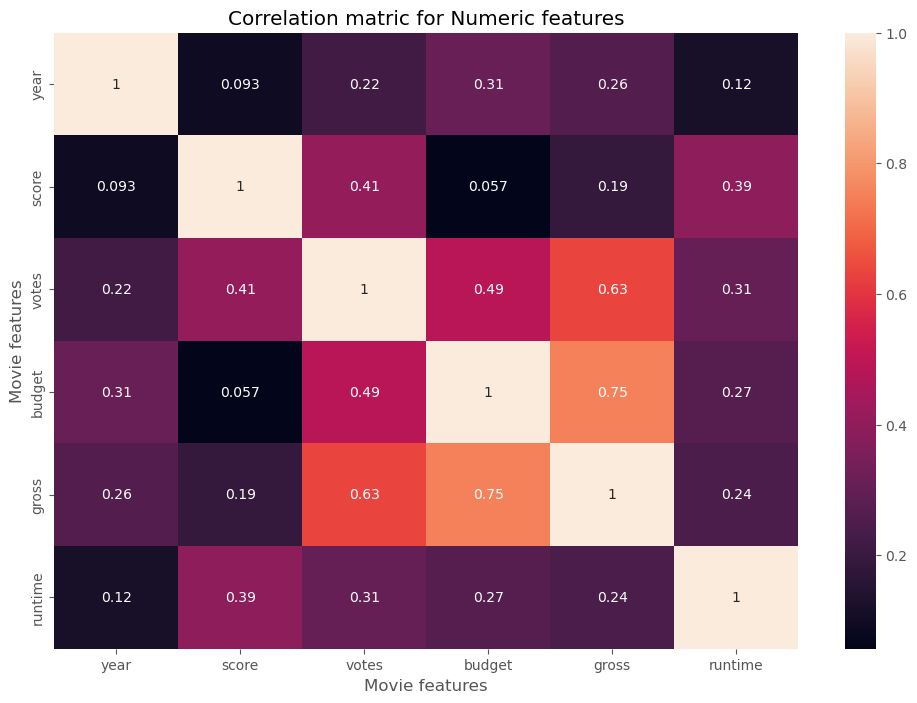

In [14]:
# There is a High correlation between budget and gross.

correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matric for Numeric features")
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [21]:
df_numerized=df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype=='object':
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,2
1,The Blue Lagoon,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,2
2,Star Wars: Episode V - The Empire Strikes Back,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,2
3,Airplane!,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,2
4,Caddyshack,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,6,2020,2965,3.1,18.0,1500,2290,2422,56,7000,0,0,90.0,42
7664,Dream Round,0,4,2020,1108,4.7,36.0,774,2615,1887,56,0,0,540,90.0,42
7665,Saving Mbango,0,6,2020,194,5.7,29.0,2061,2684,2041,56,58750,0,942,0.0,42
7666,It's Just Us,0,6,2020,2818,0.0,0.0,1184,1825,451,56,15000,0,0,120.0,42


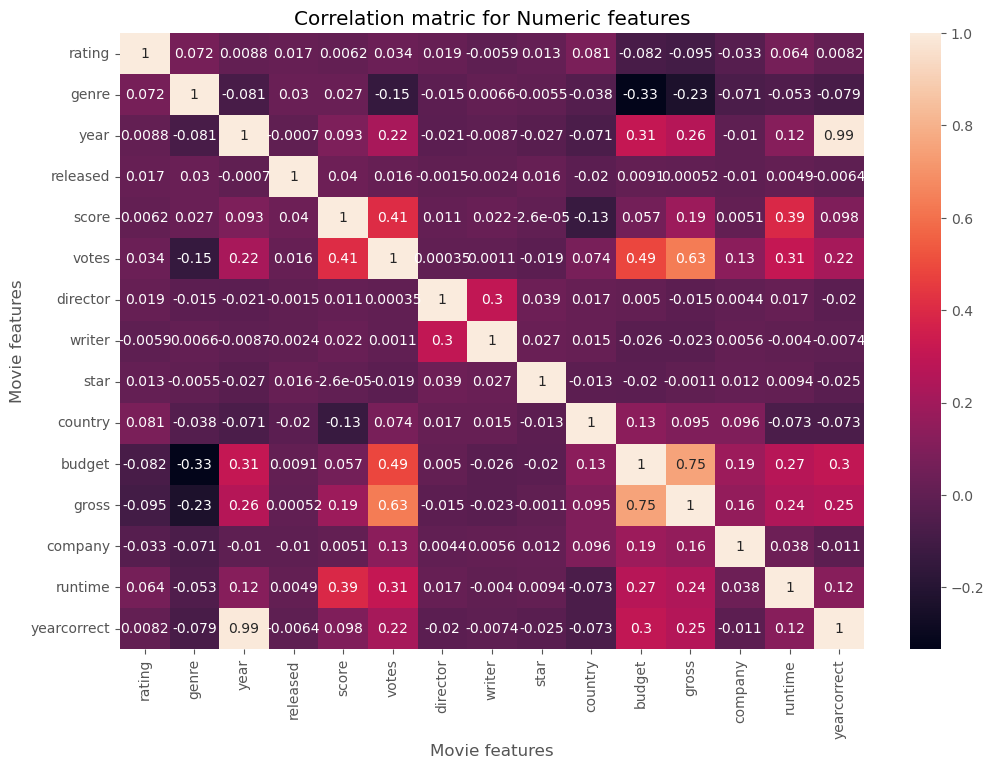

In [22]:
correlation_matrix_2=df_numerized.corr(numeric_only=True)
sns.heatmap(correlation_matrix_2, annot=True)
plt.title("Correlation matric for Numeric features")
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [32]:
corr_matrix=df_numerized.corr(numeric_only=True)

corr_matrix.unstack()

rating       rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
                              ...   
yearcorrect  budget         0.300649
             gross          0.254946
             company       -0.011060
             runtime        0.120915
             yearcorrect    1.000000
Length: 225, dtype: float64

In [33]:
corr_matrix=df_numerized.corr(numeric_only=True)
corr_pairs=corr_matrix.unstack()
print(corr_pairs)

rating       rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
                              ...   
yearcorrect  budget         0.300649
             gross          0.254946
             company       -0.011060
             runtime        0.120915
             yearcorrect    1.000000
Length: 225, dtype: float64
